In [8]:
import os
import re
import json
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.transforms import Bbox

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

from results_utils import create_dir, walk_paths, load_dfs

In [26]:
realpath = os.path.dirname(".")
save_fig_dir = os.path.join(realpath, "figures")
create_dirs = [save_fig_dir]
create_dir(create_dirs)

env_list = ["Coat", "KuaiRec"]
metrics = ['R_tra', 'len_tra', 'ctr']
way = "FB"

dirpath = os.path.join(realpath, "result_logs/2-model-freeRL")
load_filepath_list = [os.path.join(dirpath, envname) for envname in env_list]
savename = "fig_1-training_curve"
rename_cols = {
    "DQN": "DQN",
    "C51": "C51",
    "PG": "PG",
    "A2C": "A2C",
    "DiscretePPO": "PPO",
    "ContinuousPG": "PG(C)",
    "ContinuousA2C": "A2C(C)",
    "ContinuousPPO": "PPO(C)",
    "DORL": "DORL",
    "Intrinsic": "Intrinsic",
}
dfs = load_dfs(load_filepath_list, metrics = metrics, rename_cols=rename_cols)

In [29]:
series = "ABCDEFG"
methods_list = list(rename_cols.values())
methods_order = dict(zip(methods_list, list(range(len(methods_list)))))
num_methods = len(methods_list)
ax_ylabel = ["Cumulative reward", "Interaction length", "Single-round reward"]

colors = sns.color_palette(n_colors=num_methods)
markers = ["o", "s", "p", "P", "X", "*", "h", "D", "v", "^", ">", "<", "x", "H"]
if len(markers) < num_methods:
    markers = markers * (num_methods // len(markers) + 1)                            
markers = markers[:num_methods]
mark_num=10

/tmp/ipykernel_46818/1225664903.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_index(axis=1, key=lambda col: [methods_order[x] for x in col.to_list()], level=1, inplace=True)


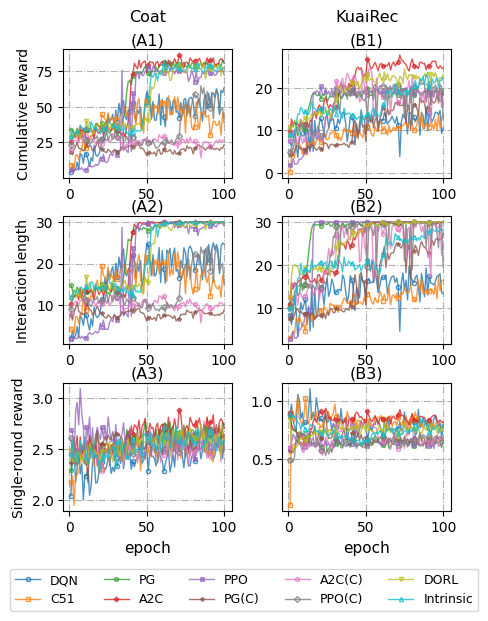

In [30]:
fig = plt.figure(figsize=(2.5 * (len(dfs)), 6))
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.3)

axs = []
for index_k in range(len(dfs)): # index_k: index of env
    alpha = series[index_k]
    cnt = 1
    df = dfs[index_k][way]
    df.sort_index(axis=1, key=lambda col: [methods_order[x] for x in col.to_list()], level=1, inplace=True)
    _axs = []
    for (ax_index, visual_metric) in enumerate(metrics):
        _ax = plt.subplot2grid((3, len(dfs)), (ax_index, index_k))
        data = df[visual_metric]

        data.plot(kind="line", linewidth=1, ax=_ax, legend=None, color=colors, markevery=round(len(data)/mark_num),
                    fillstyle='none', alpha=.8, markersize=3)
        for i, line in enumerate(_ax.get_lines()):
            line.set_marker(markers[i])
        
        plt.yticks(fontsize=10)
        plt.xticks(fontsize=10)
        plt.grid(linestyle='dashdot', linewidth=0.8)

        _ax.set_title("({}{})".format(alpha, ax_index+1), fontsize=11.5, loc="left", x=0.4, y=.97)
        if ax_index == 0:
            _ax.set_title("{}".format(env_list[index_k]), fontsize=11.5, y=1.15, fontweight=400)

        if ax_index == 2:
            _ax.set_xlabel("epoch", fontsize=11)
        if index_k == 0:
            _ax.set_ylabel(ax_ylabel[ax_index], fontsize=10, fontweight=400)
        _axs.append(_ax)
    axs.append(tuple(_axs))

# fig legend
dict_label = {}
for group, df in enumerate(dfs):
    axx = axs[group][0]
    lines, labels = axx.get_legend_handles_labels()
    dict_label.update(dict(zip(labels, lines)))
axx = axs[-1][0]
axx.legend(handles=dict_label.values(), labels=dict_label.keys(), fontsize=9, ncol=5, bbox_to_anchor=(1.2, -3))

fig.savefig(os.path.join(save_fig_dir, savename + '.pdf'), format='pdf', bbox_inches='tight')
fig.savefig(os.path.join(save_fig_dir, savename + '.png'), format='png', bbox_inches='tight')
plt.show()